<a href="https://colab.research.google.com/github/NervOUs11/Predict_S-P500/blob/main/Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install yfinance

In [2]:
# Import libraries
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import datetime as dt
from keras.models import load_model

from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

In [3]:
# Load train data
sp500 = yf.Ticker('^GSPC')

interval = '1d'
start = '1927-01-01'
end = '2000-01-01'

train_data = sp500.history(interval=interval, start=start, end=end)

# Show
train_data

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,0.0,0.0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,0.0,0.0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,0.0,0.0
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
...,...,...,...,...,...,...,...
1999-12-27 00:00:00-05:00,1458.339966,1463.189941,1450.829956,1457.099976,722600000,0.0,0.0
1999-12-28 00:00:00-05:00,1457.089966,1462.680054,1452.780029,1457.660034,655400000,0.0,0.0
1999-12-29 00:00:00-05:00,1457.660034,1467.469971,1457.660034,1463.459961,567860000,0.0,0.0


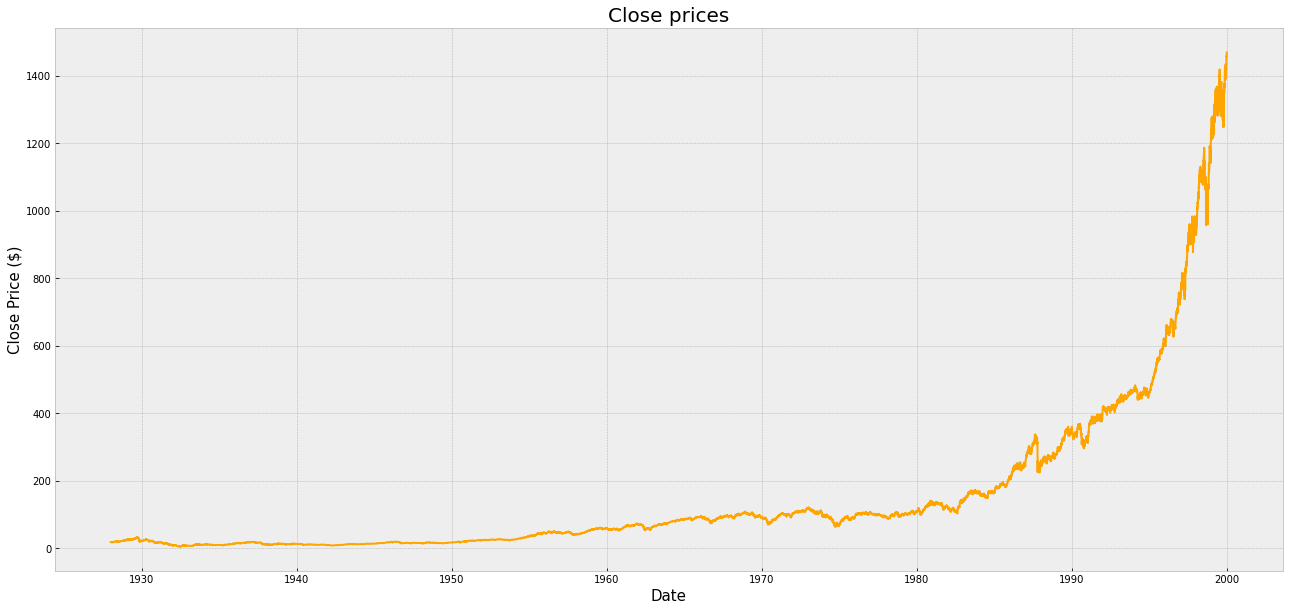

In [4]:
# Show the close price
plt.figure(figsize=(22,10))
plt.style.use('bmh')
plt.title('Close prices',fontsize=20)
plt.plot(train_data['Close'], color='orange')
plt.xlabel('Date',fontsize=15)
plt.ylabel('Close Price ($)',fontsize=15)
plt.show()

In [5]:
# Prepare data set

# Normalize data
scaler = MinMaxScaler(feature_range=(0,1))
new_train_data = scaler.fit_transform(train_data['Close'].values.reshape(-1,1))

new_train_data

array([[0.00905212],
       [0.00912039],
       [0.00909308],
       ...,
       [0.99604735],
       [0.99673685],
       [1.        ]])

In [6]:
new_train_data.shape

(18078, 1)

In [7]:
days = 70
x_train, y_train = [], []

for i in range(days, len(new_train_data)):
  x_train.append(new_train_data[i-days:i])
  y_train.append(new_train_data[i])

In [8]:
# Convert to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [ ]:
x_train

In [ ]:
y_train

In [11]:
x_train.shape

(18008, 70, 1)

In [12]:
y_train.shape

(18008, 1)

In [13]:
# Create model
model = Sequential()
model.add(LSTM(64, return_sequences=True, input_shape=(x_train.shape[1],x_train.shape[2])))
model.add(Dropout(0.1))
model.add(LSTM(64, return_sequences=True))
model.add(Dropout(0.1))
model.add(LSTM(64))
model.add(Dropout(0.1))
model.add(Dense(32))
model.add(Dense(1))

In [14]:
# Complie model
model.compile(optimizer='adam', loss='mean_squared_error')

In [15]:
#Train the model
model.fit(x_train, y_train, epochs=8, validation_split=0.2)

Epoch 1/8
451/451 [==============================] - 91s 178ms/step - loss: 3.0033e-05 - val_loss: 0.0023
Epoch 2/8
451/451 [==============================] - 63s 140ms/step - loss: 7.1067e-06 - val_loss: 4.6005e-04
Epoch 3/8
451/451 [==============================] - 61s 136ms/step - loss: 7.2876e-06 - val_loss: 0.0010
Epoch 4/8
451/451 [==============================] - 61s 136ms/step - loss: 5.6273e-06 - val_loss: 2.0175e-04
Epoch 5/8
451/451 [==============================] - 61s 135ms/step - loss: 6.8263e-06 - val_loss: 6.0755e-04
Epoch 6/8
451/451 [==============================] - 61s 135ms/step - loss: 6.2363e-06 - val_loss: 7.7129e-04
Epoch 7/8
451/451 [==============================] - 62s 137ms/step - loss: 5.9599e-06 - val_loss: 2.0141e-04
Epoch 8/8
451/451 [==============================] - 62s 138ms/step - loss: 6.0049e-06 - val_loss: 3.5838e-04


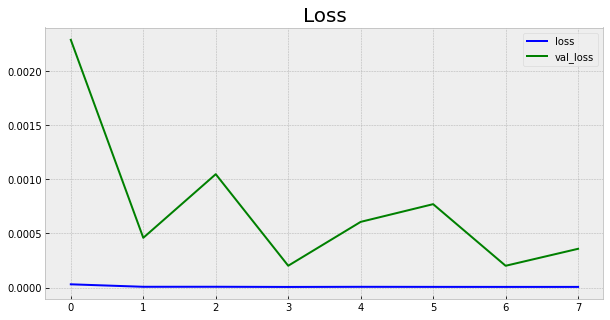

In [16]:
# Show loss
plt.figure(figsize=(10,5))
plt.style.use('bmh')
plt.title('Loss',fontsize=20)
plt.plot(model.history.history['loss'], color='blue')
plt.plot(model.history.history['val_loss'], color='green')
plt.legend(['loss', 'val_loss'])
plt.show()

In [17]:
# Save model
model.save('my_model.h5')

In [18]:
# Load model
model = load_model('my_model.h5')

In [19]:
# Load test data
sp500 = yf.Ticker('^GSPC')

interval = '1d'
start = '2000-01-01'
end = dt.datetime.now()

test_data = sp500.history(interval=interval, start=start, end=end)
real_prices = test_data['Close'].values

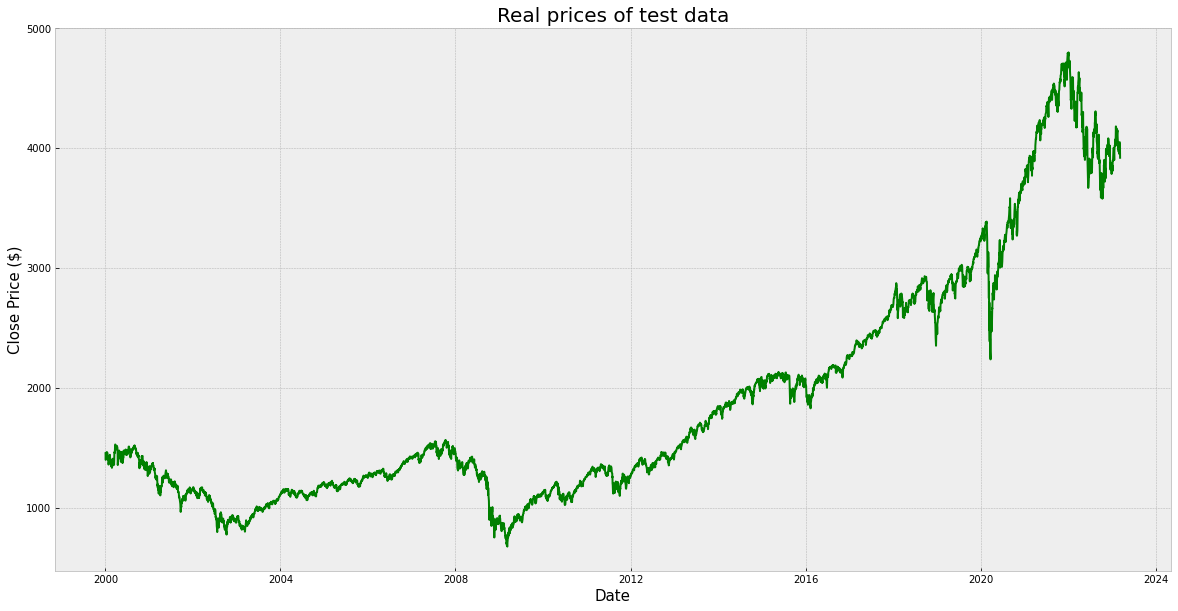

In [20]:
# Show real price of test data
plt.figure(figsize=(20,10))
plt.style.use('bmh')
plt.title('Real prices of test data',fontsize=20)
plt.plot(test_data['Close'], color='green')
plt.xlabel('Date',fontsize=15)
plt.ylabel('Close Price ($)',fontsize=15)
plt.show()

In [21]:
# Merge all data from 1927-01-01 to now
all_data = pd.concat((train_data['Close'],test_data['Close']))

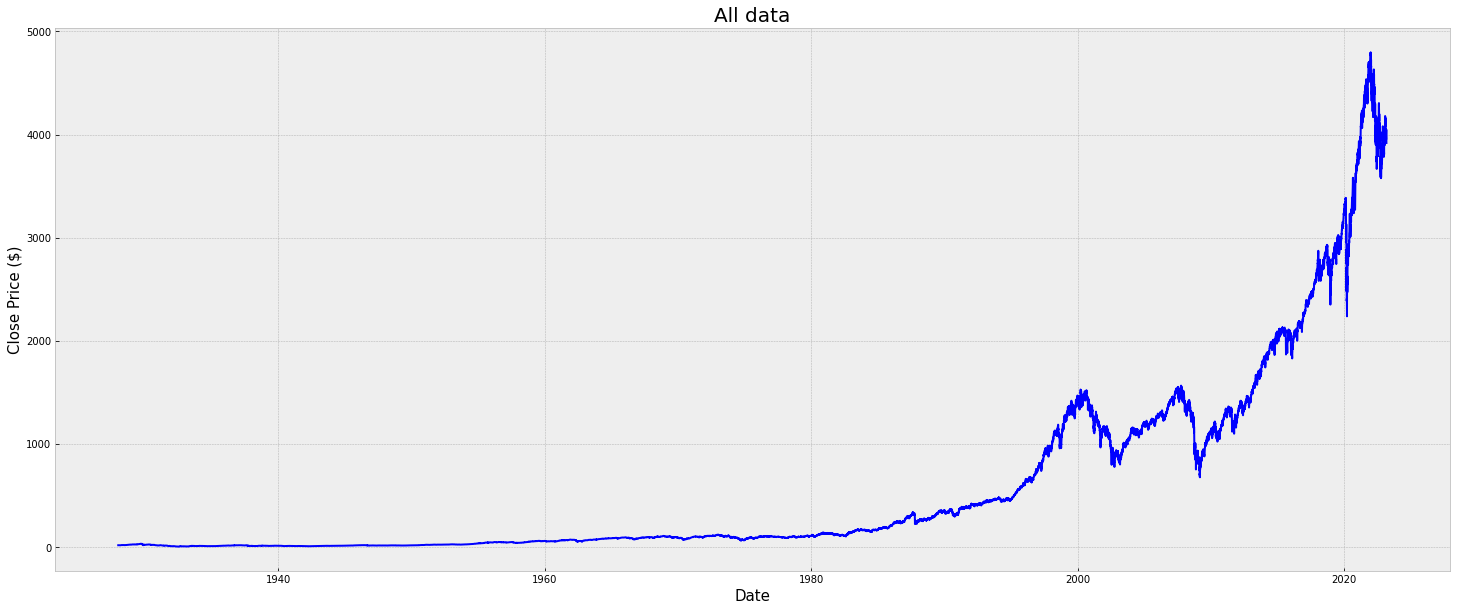

In [22]:
# Show all data from 1927-01-01 to now
plt.figure(figsize=(25,10))
plt.title('All data',fontsize=20)
plt.style.use('bmh')
plt.plot(all_data, color='blue')
plt.xlabel('Date',fontsize=15)
plt.ylabel('Close Price ($)',fontsize=15)
plt.show()

In [23]:
# Set model's input 
model_input = all_data[len(all_data) - len(test_data) - days:].values
model_input = model_input.reshape(-1, 1)
model_input = scaler.fit_transform(model_input)

In [24]:
x_test = []

for i in range(days, len(model_input)):
  x_test.append(model_input[i-days:i])

#Convert to numpy array
x_test = np.array(x_test)

#Predict
predicted_prices = model.predict(x_test)
predicted_prices = scaler.inverse_transform(predicted_prices)

183/183 [==============================] - 8s 38ms/step


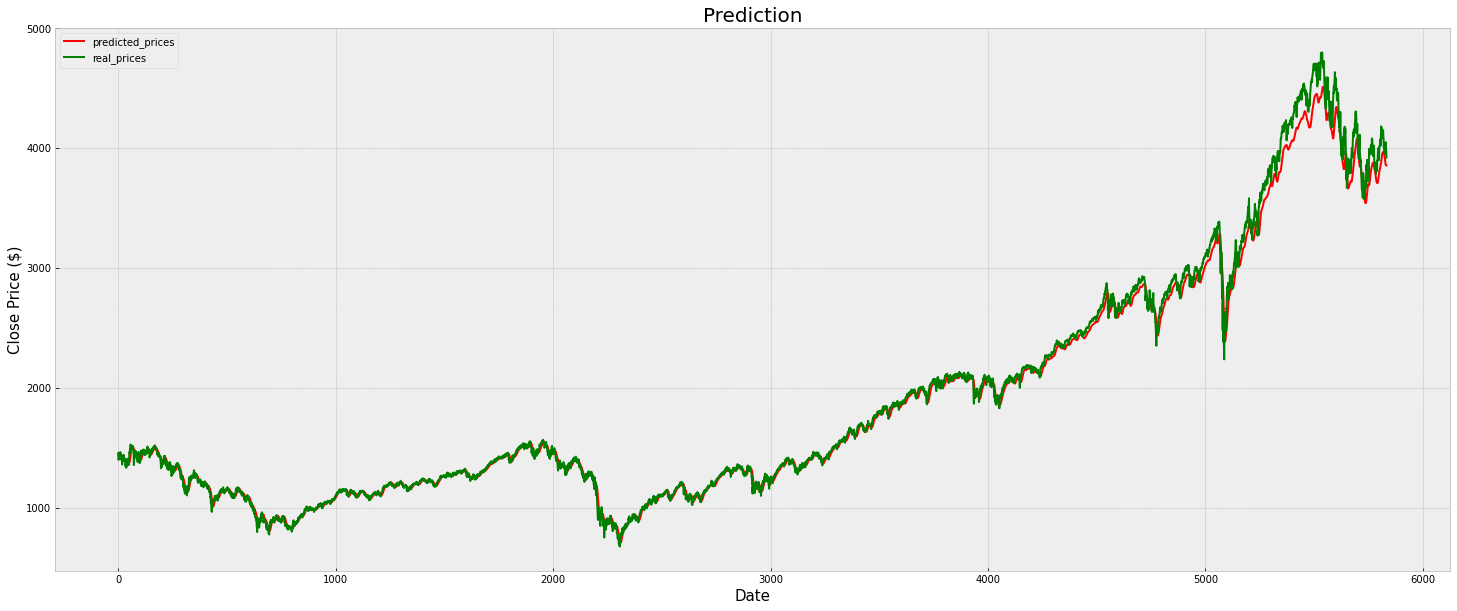

In [39]:
# Show result
plt.figure(figsize=(25,10))
plt.title('Prediction',fontsize=20)
plt.style.use('bmh')
plt.plot(predicted_prices, color='red', label='predicted_prices')
plt.plot(real_prices, color='green', label='real_prices')
plt.legend(loc='upper left')
plt.xlabel('Date',fontsize=15)
plt.ylabel('Close Price ($)',fontsize=15)
plt.show()

In [52]:
test_data_table = test_data.filter(['Close'])
checktable = test_data_table[:end]
checktable['Prediction'] = predicted_prices

checktable

<ipython-input-52-d0673a82be7b>:2: FutureWarning: Indexing a timezone-aware DatetimeIndex with a timezone-naive datetime is deprecated and will raise KeyError in a future version.  Use a timezone-aware object instead.
  checktable = test_data_table[:end]
<ipython-input-52-d0673a82be7b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  checktable['Prediction'] = predicted_prices


,Close,Prediction
Date,,
2000-01-03 00:00:00-05:00,1455.219971,1443.406006
2000-01-04 00:00:00-05:00,1399.420044,1447.891357
2000-01-05 00:00:00-05:00,1402.109985,1449.027100
2000-01-06 00:00:00-05:00,1403.449951,1446.706055
2000-01-07 00:00:00-05:00,1441.469971,1441.772827
...,...,...
2023-03-03 00:00:00-05:00,4045.639893,3865.901367
2023-03-06 00:00:00-05:00,4048.419922,3858.003418
2023-03-07 00:00:00-05:00,3986.370117,3855.082520
